# Unit 2: Python Basics
 

Estimated time to completion: 2 hours

 we are going to learn 
 
1. How to **create variables in Python**:
2. Which **types of variables** you can create,
3. How you can operate with those variables.

Remember that variables are like storage space for interesting data. 

We are going to use variables to store sensor data and manipulate it to understand the current situation of the robot.

3. Additionally, you will learn how to add comments to the code.

In this course, we want to keep the focus on Python, not on ROS.

However, in order to be able to interact with the simulated robot while hiding all the ROS stuff, we are providing you with a Python class in charge of managing all the ROS connections under the hood. 
> This class is called RobotControl. So, during this course, you will be interacting with this Python class by calling its methods to get data from the robots and send commands to them.

NOTE: maybe some of these concepts, like Python classes or methods, sound weird to you right now, but don't worry, you will learn about them later in the course.

Also, in order to be able to use Python 3 alongside with ROS, you are going to use a virtual environment. 

A virtual environment is a tool that allows you to create an isolated Python environment, where you can install packages without interfering with other environments. 
> In order to activate, you just need to execute the following command in a Web Shell:



In [ ]:
source ~/.py3venv/bin/activate

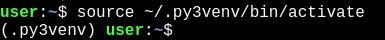

## 1 Data Types and Variables

In the following exercise, you are going to create and execute a very simple Python script that will

* allow us to introduce some important basic concepts related to Python.



### Exercise 2.1 

Let's create a directory to store our robot control code.

Inside that robot_control directory, we will create a new Python script named *pyscript1.py*.




In [ ]:
$ mkdir robot_control

$ cd robot_control

$ touch pyscript1.py

In [ ]:
from robot_control_class import RobotControl

rc = RobotControl()

a = rc.get_laser(360)

print ("The distance measured is: ", a)

In [ ]:
python pyscript1.py


```
* RobotControl

This class is the one we at Robot ignite Academy have created to help you interact with the
 ROS robot without having to actually use ROS.
```


**What does it mean to import?**

* Imports are very useful and common in Python.
* Imports allow you to include in your program the code created in other Python modules.
* This means that the Python code in your program can execute the Python code defined in another program file (in this case, the code of the RobotControl class), without having to rewrite it.

**To import the code of another Python module, indicate the following:**



### Code explanation


In [ ]:
from robot_control_class import RobotControl
#importing a Python class named RobotControl. 


In [ ]:
from <name_of_the_module> import <function_or_class_to_be_imported>

 
```
In our case, we are importing a Python class named *RobotControl*, 
which is defined in the Python module named *robot_control_clas*.
```

**How do you know which modules and classes to import?**

That is a very good question! You must know beforehand which modules may be interesting for your work,
*  which functions or classes those modules provide for importing.
* In order to know that, you must check the documentation of the code provided by the people who created those modules.


In this case, we (Robot Ignite Academy) have created the module robot_control_class and we know that inside that module, there is a class named Robotcontrol that provides all that we need to interact with the robot.

If you are curious and want to have a look at the robot_control_class and what it contains and provides, you can use the webshell and navigate to the following directory and check the code we have created for this course:




In [ ]:
# robot_control_class.py
#!/usr/bin/env python

import rospy
from geometry_msgs.msg import Twist
from sensor_msgs.msg import LaserScan
import time


class RobotControl():

    def __init__(self):
        rospy.init_node('robot_control_node', anonymous=True)
        self.vel_publisher = rospy.Publisher('/cmd_vel', Twist, queue_size=1)
        self.summit_vel_publisher = rospy.Publisher('/summit_xl_control/cmd_vel', Twist, queue_size=1)
        self.laser_subscriber = rospy.Subscriber(
            '/kobuki/laser/scan', LaserScan, self.laser_callback)
        self.summit_laser_subscriber = rospy.Subscriber(
            '/hokuyo_base/scan', LaserScan, self.summit_laser_callback)
        self.cmd = Twist()

#### **Creating a variable**

In [ ]:
rc = RobotControl()

Here we are creating a 
* variable named **rc**, 
* which is of the **RobotControl** type. 

We will use that variable 
* to call the functions of that class that allow us to get robot sensor data. 

You will learn about this in the Python Classes chapter, later in the course.
 >  For now, just remember how to create a variable of a certain type.

### **Calling a function of the class**

The next line of the code is:

In [ ]:
# class RobotControl():


rc = RobotControl()

a = rc.get_laser(360)

# stor_variable= class_name.function(parameter)

Three new things here:

1. We are **calling the get_laser() function**, which is provided by the **RobotControl**  class.

2. We are **providing a parameter to the function** (the number 360).

3. Then, we are **storing** the output of the function **into the new variable a**.

#### **What is this get_laser() function?**


* The function **get_laser (ray_number)**:  this **function allows you to get data from the laser of the robot**. When you call this function, it will return the distance measured by the laser ray that you specify as the parameter.

* The parameter **ray_number**:  here is where you **specify a number between 0 and 719**, which will indicate the ray of the laser reading you want to get the measured distance.

Now, as you may already know, this laser is projecting many beams (720 to be 
precise) in a 2D plane parallel to the ground. 

> Those rays are measuring distance to the closest obstacle that intercepts the ray.

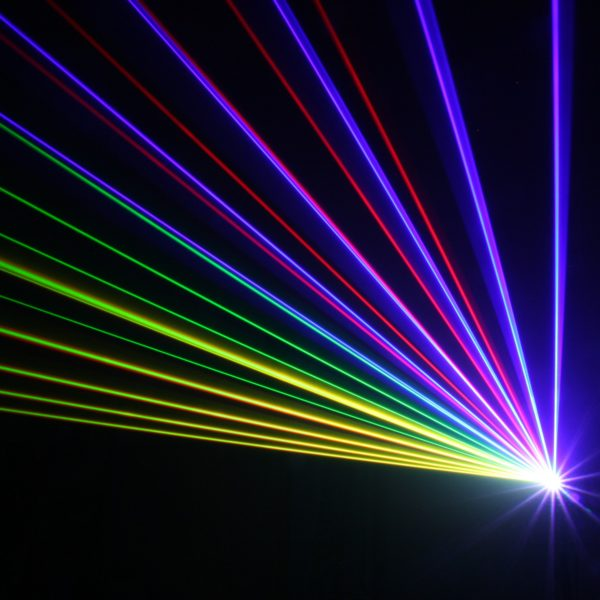

Those beams are projected from the laser in all directions, covering a range of 180 degrees in front of the robot, more or less. Check out the image below:

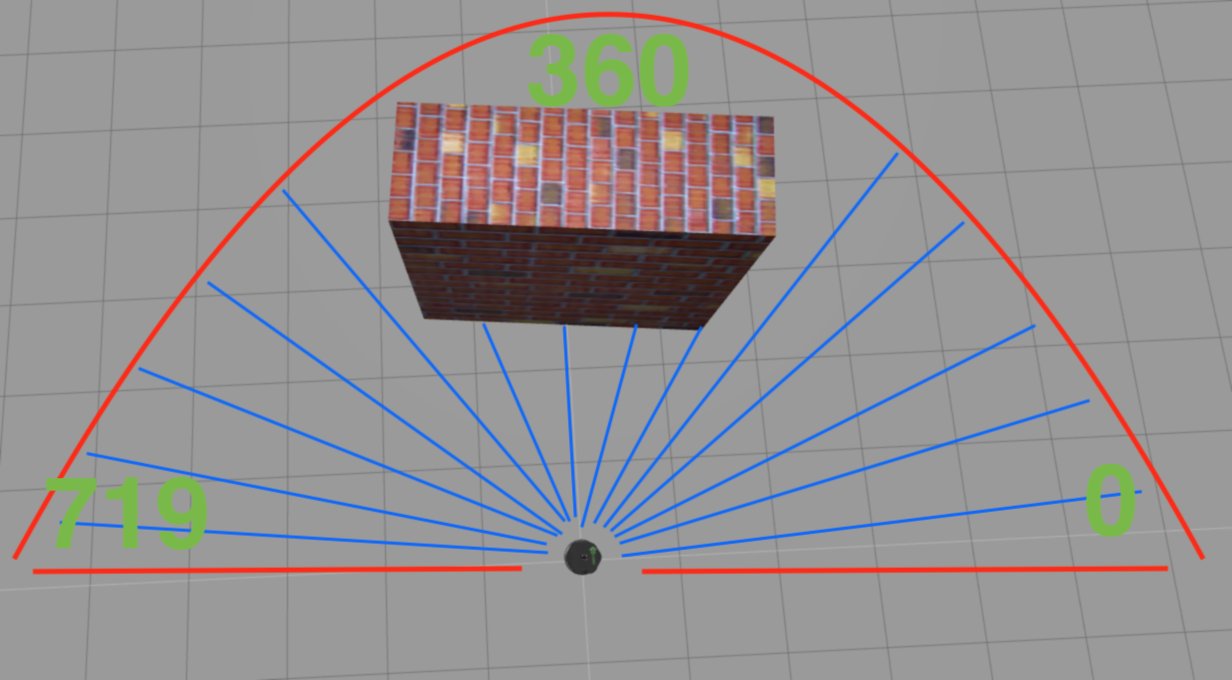

This image represents the laser beams (although in reality there are many more, we cannot draw the 720!!) being projected from the laser in a range of 180 degrees. 

Also, keep in mind the numbers that appear in this image, since they will be very important in just a moment.

What the numbers in this image mean are the following:

1. If **we pass the number 0** to the **get_laser()** function, we will get the **reading of the first laser beam at the right side of the robot.**

2. If **we pass the number 360** to the **get_laser() ** function, we will get the **reading of the laser beam right at the front of the robot**.

3. If we pass the number 719 to the **get_laser() **function, we will get the reading of the last laser beam at the left side of the robot.

4. And the same applies to all numbers in-between those.

So, by **calling the get_laser() function with the number 360 as argument, the function will return the reading of the laser right in front of the robot**. This means that we are measuring the distance to the closest obstacle just in front of the robot. And what do we have right in front of the robot? Well, we have the wall. And... do you remember what output did we get when we executed our script?

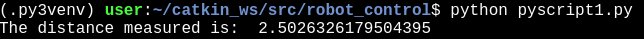

Well then, what this output means is that the **laser beam right in front of the robot (position 360) is detecting a wall at 2.5 meter**s.

#### **What does it mean to call a function?**


Before going to the final line of our script, let's introduce another concept: **call a function**.

 
 * In order to call a function, you just have to specify the name of the function, followed by the open and close parentheses. Then, inside these parentheses, you will specify the parameters that this function needs.

In [ ]:
function_name(parameter1, parameter2, ...)

In our case, we only have 1 parameter, **ray_number**, so we call our function like this:



In [ ]:
rc.get_laser(360)

* **Note**:  Before the name of the function, we are putting the **rc object**. 
* This is because the **get_laser()** function is defined by this object.

 

### Getting the output of the function
When you call the get_laser() function, the function does its magic and computes the distance detected by the ray you specified. Then, it returns that value to the caller.

This means that calling the function provides a result that must be stored somewhere. That somewhere is the **variable a**.

But wait... **where does the variable a come from?**

Good question!

The variable a comes from nowhere. It is **created automatically on the same line that we call the function.**

But wait... **which type of variable is a ?**

Another good question!

The type of the variable is automatically assigned by the Python system, and it matches the type of the value that is returned by the get_laser() function. This means, you don't actually need to know the type, as far as you can operate with it. Cool, isn't it?

**Showing data on the screen**

Finally, in the last line of our script, we have a **print()** function.

In [ ]:
print ("The distance measured is: ", a)

As you can see, the script you have executed is very simple, but it will allow us to introduce a couple of very important concepts that you will need for all your Python scripts: 
* **data types**
*  **variables**.


## **1 Variables**
A variable can be seen as a container that stores some data: 
* it can be a number
* text, 
* or more complex data types.

While our program is being executed, variables can be accessed or even changed, which means that a new value will be assigned to the variable.

* In most programming languages, like C++ or Java, you need to declare a variable before being able to use it. 
* There's no need to declare a variable in Python. 

If **you want to use a variable, you just think of a name and start assigning a value to it**! You can see this in the following snippet of code.

In [ ]:
a = 5
b = 'This is a string'
c = ['This', 'is', 'a', 'list', 1, 2, 3]

print(c)
print(b)

['This', 'is', 'a', 'list', 1, 2, 3]
This is a string


In [ ]:
a = 5

a = 6

print (a)

### Exercie 2.2 

a) Inside the **robot_control** folder, create a new Python script named **variables.py**. Inside this script, add the necessary code that does the following:

1. First, you will call the function **get_laser()**, with any number, and store its response into a variable named **laser1**.

2. Second, you will print this value, in order to see what you get.

3. Then, you will call the **get_laser()** function again, with a different a number, and you will store its response in another variable named **laser2**

4. Then again, you will print this value, in order to see what you get now.

5. Finally, you will call the **get_laser()** function one last time, with a different number. Now, you will store its response in the same variable **laser2**.
And you will print again the value of this **laser2** variable, to see what you get now.

In [ ]:
from robot_control_class import RobotControl

robotcontrol = RobotControl()

laser1 = robotcontrol.get_laser(0)
print ("The laser value received is: ", laser1)

laser2 = robotcontrol.get_laser(360)
print ("The laser value received is: ", laser2)

laser2 = robotcontrol.get_laser(719)
print ("The laser value received is: ", laser2)



```
'The laser value received is: ', inf)
('The laser value received is: ', 2.4950292110443115)
('The laser value received is: ', inf)
```

## **2 Data Types**
Every value in Python has a data type. **Basically, the data type of a variable indicates what this variable contains**: Is it a number? Is it text?

There are various data types in Python. For this chapter, we are going to introduce just some of the most important ones.

1. Numbers
2. Strings
3. Lists
4. Tuples
5. Dictionaries


### **1. Numbers**
Inside the numbers data type, we can divide into different types of numbers

1. integers 

2. floats.

In [ ]:
a = 5   # This is an integer

a = 0.5 # This is a float

### **2. Strings**


Strings are basically sequences of characters. We can use single quotes ('') or double quotes ("") to represent strings:

**The first character of a string has the index 0**. So, for instance, if we had the following code snippet:

In [ ]:
s1 = 'This is a string'

s2 = "This is also a string"

print (s1[0])
print (s1[8])
print (s2[7])
print (s2[8])
print (s2[1])
print (s2[10])

T
a
 
a
h
s


Finally, **you can also concatenate different strings.** For instance, check out the following script:



In [ ]:
s1 = 'This is'

s2 = " a string"

s3 = s1 + s2

print (s3)

This is a string


### **3. Lists**


* A Python List **is an ordered sequence of items**, where **all the items of the list do not need to be of the same type**. 

* To declare a Python List, you just have to put **all the items inside brackets [ ]**, and separate each item by commas. Check out the following script:

In [ ]:
l = [1, 2, 3, 'This', 'is', 'a', 'list']

print (l)


```
[1, 2, 3, 'This', 'is', 'a', 'list']
```


In [ ]:
l = [1, 2, 3, 'This', 'is', 'a', 'list']

print (l[2])
print (l[0:3])
print (l[3:])


```
3
[1, 2, 3]
['This', 'is', 'a', 'list']
```


Finally, another important thing is that **lists can be updated** . Check out the following example:



In [ ]:
l = [1, 2, 3, 'This', 'is', 'a', 'list']
print (l)

l[2] = 8
print (l)



```
[1, 2, 3, 'This', 'is', 'a', 'list']
[1, 2, 8, 'This', 'is', 'a', 'list']
```



### **4. Tuples**

* Tuples consist of a **series of values separated by commas**, which are **enclosed within** parentheses **()**.

* The particularity of **tuples is that they cannot be updated**, **they are read-only**. 

* So basically, **they are the same as lists**, the only difference being that the values inside a **tuple cannot be updated**. Check out the following example:

In [ ]:
t = (1, 2, 3, 'This', 'is', 'a', 'tuple')

print (t)

(1, 2, 3, 'This', 'is', 'a', 'tuple')


### **5. Dictionaries**


* Dictionaries are **also similar to lists**, in the sense that **they contain a list of values and that they can be updated**. 

* But the main difference is that items in d**ictionaries are accessed via keys and not via their position.**

* So basically, dictionaries are a list of items, **with each item being a pair made up of a key and a value**.

Check out the following example:

In [ ]:
dict = {"Jon": 25, "Daenerys": 22, "Cersei": 31, "Night King": 35}

print (dict["Jon"])
print (dict["Night King"])



```
25
35
```



### Exercise 2.3

a) Create a new Python script named **lists.py**. Inside this script, add the necessary code that does the following:

* First, you will call the **get_laser_full()** function, and will store its response in a Python list.

* Then, you will print the **positions 0, 360, and 719** from the full list of readings.


In [ ]:
##lists.py

from robot_control_class import RobotControl

rc = RobotControl()

l = rc.get_laser_full()

print ("Position 0: ", l[0])
print ("Position 360: ", l[360])
print ("Position 719: ", l[719])



```
('Position 0: ', inf)
('Position 360: ', 2.453843593597412)
('Position 719: ', inf)
```



### **Exercise 2.4**

a) Create a new Python script named **dictionaries.py**. Inside this script, add the necessary code that does the following:

1. First, you will call the **get_laser_full()** function, and will store its response in a Python list.

2. Then, you will create a **dictionary that will contain the position in the list** and **its corresponding value as key-value pairs.** Check the example below:

> * Position 1: 5
> * Position 52: 32
> * Position 231: 0
> * Position 644: 21

> You will do this for the following positions in the list: 0, 100, 200, 300, 400, 500, 600, 719.

3. Finally, you will print the resulting dictionary.

In [ ]:
# dictionaries.py

from robot_control_class import RobotControl

rc = RobotControl()

l = rc.get_laser_full()

dict = {"P0": l[0], "P100": l[100], "P200": l[200], "P300": l[300], "P400": l[400], "P500": l[500], "P600": l[600], "P719": l[719]}

print (dict)





```
{'P400': 2.5561165809631348, 'P719': inf, 'P0': inf, 
'P600': inf, 'P200': inf, 'P500': inf, 
'P100': inf, 'P300': 2.5991907119750977}

```



## **3 I/O functions**


**Print**

*  Basically, the print function is used to write into the standard output of the program. 

* to let him know what's going on;

* but it's also very useful when we want to debug our own programs.

Check out the following example in order to see some uses for the print function:

In [ ]:
a = 5

print ("Simple print")
print ("Now we print the variable a = " + str(a))
# print combines a regular print with a variable. 
# Note that we are converting the variable to a string value.

print ("Now we print the variable a = %d" % a)
# Regular print also combines a regular print with a variable.
# this case we don't need to convert the variable to a string value, because we are using the % formatting

print ("This is an example of a \n new line")
# New line 

Simple print
Now we print the variable a = 5
Now we print the variable a = 5
This is an example of a 
 new line


### Input


*  In programming, this is usually known as **I/O (input/output) functionalities.**

*  While the input will be performed by the **input() function.** Check out the following example:

In [ ]:
name = input("What's your name? ")

print("Nice to meet you, " + name)

What's your name? amit
Nice to meet you, amit


In [ ]:
age = input("What's your age? ")

age2 = age + 1

print("So next year you will be %d years old!" % age2)

**TypeError  Traceback (most recent call last)**

```
-> 3 age2 = age + 1
      4 
      5 print("So next year you will be %d years old!" % age2)

TypeError: must be str, not int
```

*  First of all, you need to know that **Python 3 doesn't evaluate the data received with the input function and returns it as it is, as a string.**

* This means that **the age variable will contain an string**. 

* **So, in the operation age + 1, we are actually trying to add a string and an integer.** 
> * This operation **is not possible,** so we are getting an error. Then... what can we do?

* Well, if we want to make sure that the content of the age variable is an integer, the easiest way is to explicitly convert it. For this we can use the int() function, like this:

In [ ]:
age = int(input("What's your age? "))

In [ ]:
age = int(input("What's your age? "))

age2 = age + 1

print("So next year you will be %d years old!" % age2)

What's your age? 18
So next year you will be 19 years old!


### Exercise 2.5

a) Create a new Python script named **test_input.py**.

b) Inside the script, create a code that does the following:


1. First, it asks the **user to enter a number between 0 and 719.**

2. Second, it **calls the get_laser() function**, using the entered number as the parameter.

3. Finally, it prints the response of the **get_laser()** function to the user.

In [ ]:
# test_input.py.
from robot_control_class import RobotControl

laser1 = int(input(" enter a number between 0 and 719 "))

rc = RobotControl()

l = rc.get_laser_full(laser1)

print ("The laser value received is:" ,l)



In [ ]:
from robot_control_class import RobotControl

num = int(input("Select a number between 0 and 719: "))

rc = RobotControl()
a = rc.get_laser(num)

print ("The laser value received is: ", a)

## 4 Operators

In Python, operators are used to perform operations on variables and values. We can divide the operators into the following basic groups:

1. Arithmetic Operators
2. Assignment Operators
3. Comparison Operators
4. Logical Operators

### **1. Arithmetic Operators**


```
 Operator	 Name	Example

 +	     Addition   	 1 + 1 = 2
 -	     Substraction	2 - 1 = 1
 *	     Multiplication	2 * 2 = 4
 / 	    Division	     5 / 2 = 2
 %	     Modulus	      5 % 2 = 1

```



In [ ]:
a = 5
b = 2

print (a+b)
print (a-b)
print (a*b)
print (a/b)
print (a%b)

7
3
10
2.5
1


### **2. Assignment Operators**


```
Operator	Example	Same As
 =	    x = 5	    x = 5
+=	    x += 3  	x = x + 3
-=	    x -= 3  	x = x - 3
*=    	x *= 3	  x = x * 3
/=	    x /= 3  	x = x / 3
%=	    x %= 3  	x = x % 3

```



In [ ]:
x = 5
x += 1
print (x)
# answer 6

x -= 2
print (x)
# answer 4

x *= 2
print (x)
# answer 8


6
4
8


### **3. Comparison Operators**



```
Operator	Means	                    Same As
  ==	      Equal	                   5 == 5
  !=	      Not Equal	               4 != 5
  >	       Greater than	            5 > 4
  <	       Less than	               4 < 5
  >=	      Greater than or equal to	5 >= 4
  <=	      Less than or equal to	   4 <= 5

```



In [ ]:
a = 5
b = 6

if (a == b):
    print ("a is equal to b")

if (a > b):
    print ("a is greater than b")
    
if (a < b):
    print ("a is less than b")
    
if (a >= b):
    print ("a is greater than or equal to b")
    
if (a <= b):
    print ("a is less than or equal to b")

a is less than b
a is less than or equal to b
